Preparing Dataset for Classification Model by Calculating Technical Indicators

In [13]:
#Libraries
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Scraping Dataset from Yahoo Finance using yfinance

In [14]:

#Getting data for the Apple Stock
aapl = yf.Ticker("AAPL")

# Apple Company Information
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [15]:
# Apple's Historical Stock Prices
# get historical market data
aapl.dataset = aapl.history(period="max")

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0


Stochastic Oscillator Indicator

In [16]:
# Calculating %K and %D
aapl.dataset['14-high'] = aapl.dataset['High'].rolling(14).max()
aapl.dataset['14-low'] = aapl.dataset['Low'].rolling(14).min()
aapl.dataset['%K'] = (aapl.dataset['Close'] - aapl.dataset['14-low'])*100/(aapl.dataset['14-high'] - aapl.dataset['14-low'])
aapl.dataset['%D'] = aapl.dataset['%K'].rolling(3).mean()

In [17]:
# Adding Buy/Sell Signals from Sotchastic Oscillator Indicator
def categorise_so(row):  
    if row['%K'] <= 20 and row['%D'] <= 20:
        return 'Buy'
    elif row['%K'] >= 80 and  row['%D']>= 80:
        return 'Sell'
    else:
        return 'Hold'

    
   
aapl.dataset['SO Indicator'] = aapl.dataset.apply(lambda row: categorise_so(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator
Date,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0,179.610001,154.460007,95.347919,86.757479,Sell
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,65.035139,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,50.348042,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy


SO Distrubition
1412 (Hold) / 10,422 (Total) * 100 = 13.5%

In [18]:
# Distrubition of the Indicator
print(aapl.dataset['SO Indicator'].value_counts())

Hold    6707
Sell    2303
Buy     1415
Name: SO Indicator, dtype: int64


Relative Strength Index (RSI)

In [19]:
delta = aapl.dataset['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
aapl.dataset['RSI'] = 100 - (100/(1 + rs))


aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI
Date,,,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold,44.031566
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839
2022-04-18,163.919998,166.598404,163.690002,165.070007,65313731,0.0,0.0,179.610001,163.690002,8.668373,15.037109,Buy,44.009227


In [20]:
# Adding Buy/Sell Signals from RSI Indicator
def categorise_rsi(row):  
    if row['RSI'] <= 30:
        return 'Buy'
    elif row['RSI'] >= 70:
        return 'Sell'
    elif row['RSI'] < 70:
        return 'Hold'
    elif row['RSI'] > 30:
        return 'Hold'    

    
   
aapl.dataset['RSI Indicator'] = aapl.dataset.apply(lambda row: categorise_rsi(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator
Date,,,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0,179.610001,154.460007,95.347919,86.757479,Sell,63.773181,Hold
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065,Hold,57.849501,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442,Hold,52.802034,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,65.035139,Hold,53.223866,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,50.348042,Hold,50.038901,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold,44.031566,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold


RSI Distrubution
381 (Buy) / 10,421 (Total) * 100 = 3.65 %

In [21]:
# Distrubition of the Indicator
print(aapl.dataset['RSI Indicator'].value_counts())

Hold    8937
Sell    1106
Buy      381
Name: RSI Indicator, dtype: int64


Bollinger Bands

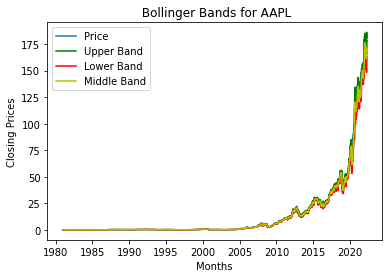

In [22]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    # SMA for 20 Days (Middle Band)
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()

    # Calculating Upper Band
    bollinger_upper = sma + (std * 2 )

    # Calculate Lower Band
    bollinger_lower = sma - (std * 2 )

    #Middle Band
    bollinger_middle = sma
    return bollinger_upper, bollinger_lower, bollinger_middle


closing_prices = aapl.dataset['Close']
bollinger_upper, bollinger_lower, bollinger_middle = get_bollinger_bands(closing_prices)

#Plotting the  Bollinger Bands
plt.title(' Bollinger Bands for AAPL')
plt.xlabel('Months')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Price')
plt.plot(bollinger_upper, label='Upper Band', c='g')
plt.plot(bollinger_lower, label='Lower Band', c='r')
plt.plot(bollinger_middle, label='Middle Band', c='y')

plt.legend()
plt.show()

In [23]:
#Adding Bollinger Bands to the Dataset
aapl.dataset['Bollinger_upper'] = bollinger_upper
aapl.dataset['Bollinger_lower'] = bollinger_lower

aapl.dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,Bollinger_upper,Bollinger_lower
Date,,,,,,,,,,,,,,,,
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold,44.031566,Hold,183.719099,156.984903
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold,182.360489,159.600514
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold,181.572397,161.469606
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold,180.917334,162.591668
2022-04-18,163.919998,166.598404,163.690002,165.070007,65313731,0.0,0.0,179.610001,163.690002,8.668373,15.037109,Buy,44.009227,Hold,180.788256,162.829748


In [24]:
# Adding Buy/Sell Signals from Bollinger Bands Indicator
def categorise_bollinger(row):  
    if row['Close'] < row['Bollinger_lower']:
        return 'Buy'
    elif row['Close'] > row['Bollinger_upper']:
        return 'Sell'
    else:
        return 'Hold'
    
   
aapl.dataset['Bollinger Indicator'] = aapl.dataset.apply(lambda row: categorise_bollinger(row), axis=1)

aapl.dataset.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,14-high,14-low,%K,%D,SO Indicator,RSI,RSI Indicator,Bollinger_upper,Bollinger_lower,Bollinger Indicator
Date,,,,,,,,,,,,,,,,,
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0.0,0.0,179.610001,154.460007,95.347919,86.757479,Sell,63.773181,Hold,184.859759,148.783243,Hold
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0.0,0.0,179.610001,157.630005,79.299345,85.505065,Hold,57.849501,Hold,185.531431,149.873570,Hold
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0.0,0.0,179.610001,159.759995,60.806064,78.484442,Hold,52.802034,Hold,185.919297,150.373705,Hold
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0.0,0.0,179.610001,163.009995,55.000009,65.035139,Hold,53.223866,Hold,186.083449,151.571553,Hold
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0.0,0.0,179.610001,164.910004,35.238053,50.348042,Hold,50.038901,Hold,185.525972,153.665030,Hold
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0.0,0.0,179.610001,165.500000,1.771793,30.669952,Hold,44.031566,Hold,183.719099,156.984903,Hold
2022-04-12,168.020004,169.869995,166.639999,167.660004,79265200,0.0,0.0,179.610001,165.500000,15.308317,17.439388,Buy,47.044665,Hold,182.360489,159.600514,Hold
2022-04-13,167.389999,171.039993,166.770004,170.399994,70618900,0.0,0.0,179.610001,165.500000,34.727099,17.269070,Hold,51.110807,Hold,181.572397,161.469606,Hold
2022-04-14,170.619995,171.270004,165.039993,165.289993,75237500,0.0,0.0,179.610001,165.039993,1.715854,17.250423,Buy,44.281839,Hold,180.917334,162.591668,Hold


In [25]:
# Distrubition of the Indicator
print(aapl.dataset['Bollinger Indicator'].value_counts())

Hold    9276
Sell     709
Buy      440
Name: Bollinger Indicator, dtype: int64
